### Importing Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
df = pd.read_csv('/Users/shoeb/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

##### Checking the shape dataset

In [3]:
 df.shape

(7043, 21)

##### Checking the data types of the columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**`Observation`**:
- Total charges column is in object data type it should be converted into float

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Luckily there is no data missing, we can work on this clean data

In [6]:
df.duplicated().sum()

0

In [7]:
df['TotalCharges']= df['TotalCharges'].replace(' ',0)

In [8]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

##### Performing Statistical Operations

In [9]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

### As there are multiple features which have 'Yes' or 'No' as input,
### Writing a function to represent 'Yes' with 1 and 'No' with zero

In [10]:
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

df2 = df.copy()

def replace_yes_no(df, columns):
    
    replacements = {'Yes': 1, 'No': 0, 'No internet service': 0}
    for column in columns:
        df[column] = df[column].replace(replacements)
    return df

columns_to_replace = ['Partner','Dependents','Dependents','PhoneService','PhoneService',
                     'OnlineSecurity','OnlineBackup','DeviceProtection',
                     'TechSupport','StreamingTV','PaperlessBilling','Churn','StreamingMovies']

df2 = replace_yes_no(df2, columns_to_replace)


In [ ]:
df2['TotalCharges']= df2['TotalCharges'].replace(' ',0)

In [ ]:
df2['TotalCharges'] = df2['TotalCharges'].astype('float64')

In [11]:
df2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### Performing Statistical operation

In [12]:
# checking the features statistically
df2.describe()

SeniorCitizen      Partner   Dependents       tenure  PhoneService  \
count    7043.000000  7043.000000  7043.000000  7043.000000   7043.000000   
mean        0.162147     0.483033     0.299588    32.371149      0.903166   
std         0.368612     0.499748     0.458110    24.559481      0.295752   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     9.000000      1.000000   
50%         0.000000     0.000000     0.000000    29.000000      1.000000   
75%         0.000000     1.000000     1.000000    55.000000      1.000000   
max         1.000000     1.000000     1.000000    72.000000      1.000000   

       OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
count     7043.000000   7043.000000       7043.000000  7043.000000   
mean         0.286668      0.344881          0.343888     0.290217   
std          0.452237      0.475363          0.475038     0.453895   
min          0.000000      0.000000          0.000000     0.000000   
25%          0.000000      0.000000          0.000000     0.000000   
50%          0.000000      0.000000          0.000000     0.000000   
75%          1.000000      1.000000          1.000000     1.000000   
max          1.000000      1.000000          1.000000     1.000000   

       StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  \
count  7043.000000      7043.000000       7043.000000     7043.000000   
mean      0.384353         0.387903          0.592219       64.761692   
std       0.486477         0.487307          0.491457       30.090047   
min       0.000000         0.000000          0.000000       18.250000   
25%       0.000000         0.000000          0.000000       35.500000   
50%       0.000000         0.000000          1.000000       70.350000   
75%       1.000000         1.000000          1.000000       89.850000   
max       1.000000         1.000000          1.000000      118.750000   

       TotalCharges        Churn  
count   7043.000000  7043.000000  
mean    2279.734304     0.265370  
std     2266.794470     0.441561  
min        0.000000     0.000000  
25%      398.550000     0.000000  
50%     1394.550000     0.000000  
75%     3786.600000     1.000000  
max     8684.800000     1.000000

##### Checking the correlation of each columns

In [13]:
df2.corr(numeric_only=True).style.background_gradient(cmap = 'Pastel2')

In [14]:
import scipy.stats
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

def chi_square_test(df, categorical_columns, target):
    results = {}
    for column in categorical_columns:
        confusion_matrix = pd.crosstab(df[column], df[target])
        chi2, p, dof, ex = chi2_contingency(confusion_matrix)
        cramers_v_value = cramers_v(confusion_matrix)
        results[column] = {
            'chi2': chi2,
            'p-value': p,
            'Cramér\'s V': cramers_v_value
        }
    return pd.DataFrame(results).T

# List of categorical columns and the target variable
categorical_columns = ['MultipleLines', 'InternetService', 'StreamingMovies', 'Contract', 'PaymentMethod']
target_variable = 'Churn'

# Perform the chi-square test and compute Cramér's V
results = chi_square_test(df, categorical_columns, target_variable)

print(results)

                        chi2   p-value  \
MultipleLines      11.330441  0.003464   
InternetService    732.30959       0.0   
StreamingMovies   375.661479       0.0   
Contract         1184.596572       0.0   
PaymentMethod     648.142327       0.0   

                                                        Cramér's V  
MultipleLines    Churn
No     0.046796
Yes    0.077861
dtype: f...  
InternetService  Churn
No     0.376213
Yes    0.625954
dtype: f...  
StreamingMovies  Churn
No     0.269454
Yes    0.448326
dtype: f...  
Contract         Churn
No     0.478489
Yes    0.796124
dtype: f...  
PaymentMethod    Churn
No     0.353934
Yes    0.588885
dtype: f...  


## Exploratory Data Analysis

* **We are going to analyze the data on**

1. customer based
2. customer account based
3. services based**

### Distributions of Monthly and Total Charges, Tenure Columns

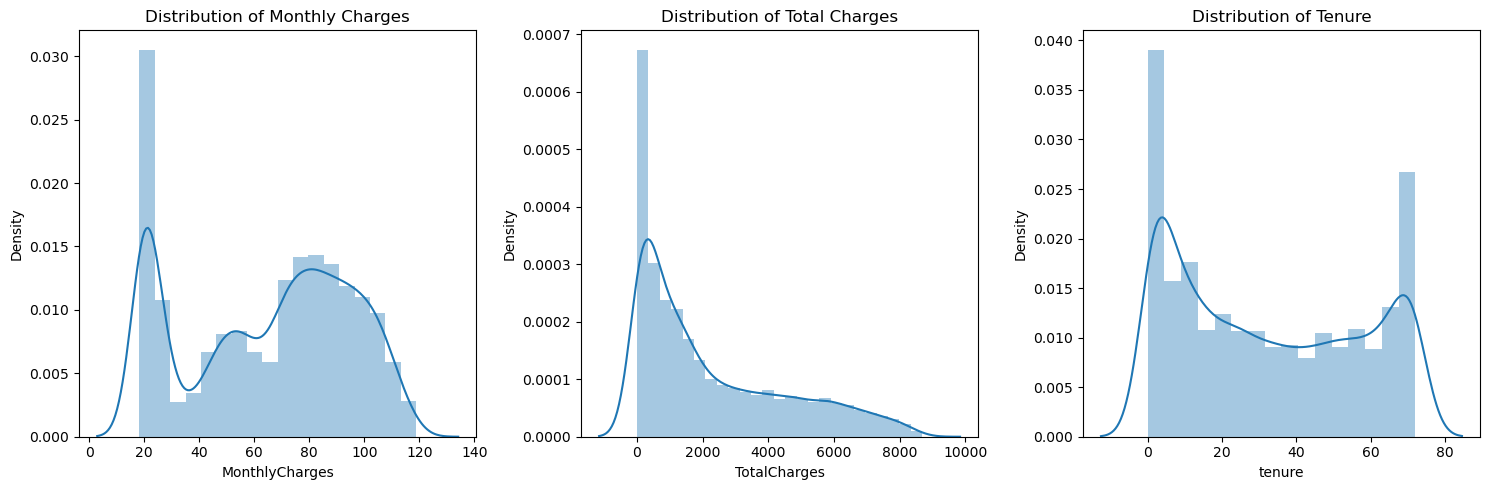

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(df['MonthlyCharges'], ax=axes[0])
axes[0].set_title('Distribution of Monthly Charges')

sns.distplot(df['TotalCharges'], ax=axes[1])
axes[1].set_title('Distribution of Total Charges')

sns.distplot(df['tenure'], ax=axes[2])
axes[2].set_title('Distribution of Tenure')

plt.tight_layout()
plt.show()

**`Observation`**:

**Distribution of Monthly Charges:**

- This graph displays the distribution of monthly charges for a certain dataset.
- There are two prominent peaks: one near 20 and another around 80.
- The density is highest at these two points, indicating that a significant  number of customers have monthly charges around these values.

**Distribution of Total Charges:**

- The second graph represents the distribution of total charges.
- It has a sharp peak near 0, suggesting that many customers have low total charges.
- As total charges increase, the density decreases steadily.

**Distribution of Tenure:**

- The third graph shows the distribution of tenure (the duration of customer relationships).
- Similar to the first graph, it also has two noticeable peaks.
- One peak is near 0 (indicating new customers), and the other is around 70 (representing long-term customers).

### Distribution of Target variable

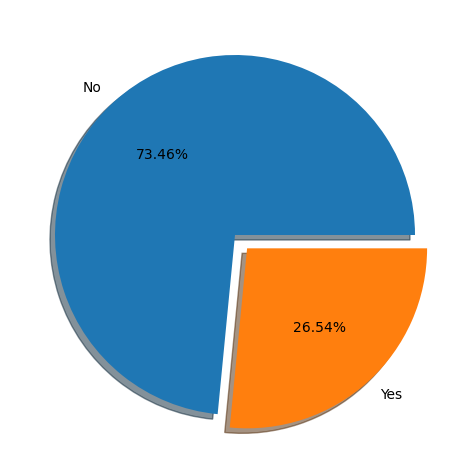

In [16]:
Churn = df['Churn'].value_counts()
labels = Churn.index

plt.pie(Churn, labels=labels, shadow=True, autopct='%1.2f%%',explode=(0,0.1))

plt.tight_layout()
plt.show()

**`Observation`**

- The pie chart illustrates the proportion of customers who churned (labeled “Yes”) versus those who did not churn (labeled “No”).
- Approximately 26.54% of customers churned, while the remaining 73.46% did not.
This indicates that a significant majority of customers remained loyal and did not switch to another service or provider.

The data is imbalance, gotta oversample using SMOTE

### A. demographics: Let us first understand the gender, partner and dependent status of the customers

### 1. Gender Distribution of customers

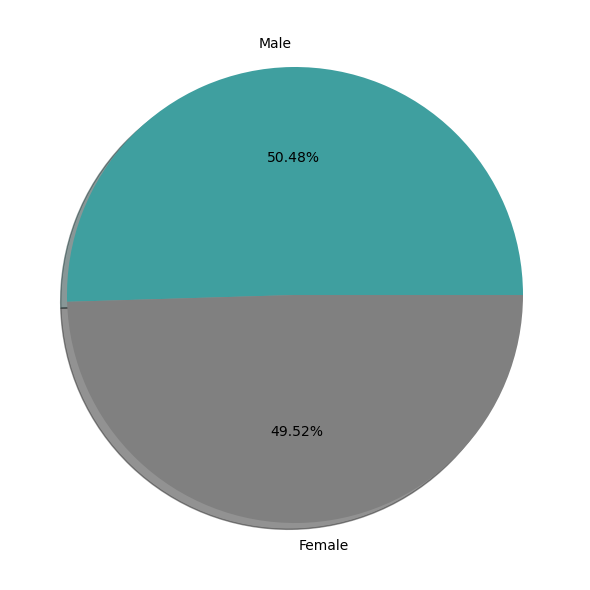

In [17]:
gender = df2['gender'].value_counts()
labels = gender.index 
colors = ['#3F9F9F','#808080']

#adjusting figure size 
plt.figure(figsize=(8,6))
plt.pie(gender, labels=labels, autopct='%1.2f%%', shadow=True,
        colors=colors, labeldistance=1.1, normalize=True)

plt.tight_layout()
plt.show()

**`Observation`**
- gender Column is equally distributed
- Male customers are higher in .48%

### 2. Dependent and Partner Status


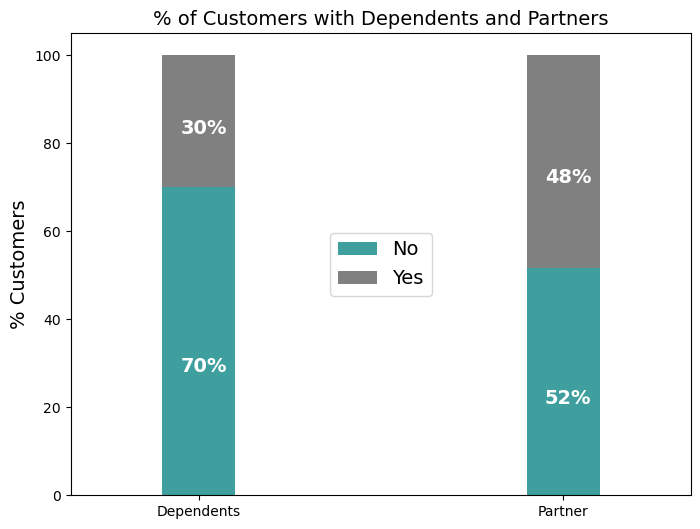

In [18]:
# Melting the DataFrame
df_melted = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])

# Grouping by variable and value and calculating the percentages
df_grouped = df_melted.groupby(['variable', 'value']).count().unstack()
df_percentages = df_grouped * 100 / len(df)

# Plotting

ax = df_percentages.loc[:, 'customerID'].plot.bar(stacked=True,
                                                  color=colors, figsize=(8, 6),
                                                  rot=0, width=0.2)

# Setting labels and title
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('')
ax.set_title('% of Customers with Dependents and Partners', size=14)
ax.legend(loc='center', prop={'size': 14})

# Adding the data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height),
                (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color='w', weight='bold', size=14)


## Observations :-

**Dependents:**

- Approximately 70% of customers have dependents (indicated in blue).
- The remaining 30% do not have dependents (indicated in grey).

**Partners:**

- About 52% of customers have partners (indicated in blue).
- The other 48% do not have partners (indicated in grey).

### Senior Citizen

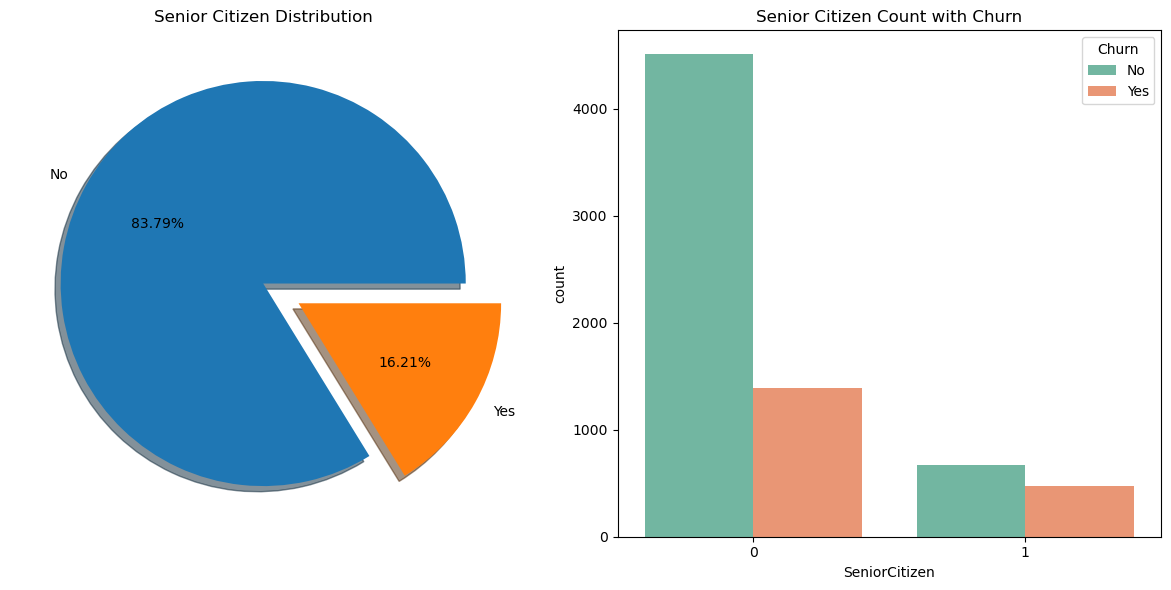

In [19]:
senior = df['SeniorCitizen'].value_counts()
labels = ['No', 'Yes']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(senior, labels=labels, shadow=True, autopct='%1.2f%%', explode=(0,0.2))
axes[0].set_title('Senior Citizen Distribution')

sns.countplot(x='SeniorCitizen', data=df, hue='Churn', ax=axes[1], palette='Set2')
axes[1].set_title('Senior Citizen Count with Churn')

plt.tight_layout()
plt.show()

**`Observation`**
- Among the cutomers only 16.21 are senior citizens
- Most churning customers are younger or middle aged people
- Churning rate in senior citizens is less

### Customer Account based Analysis
### 1. Tenure and Contract

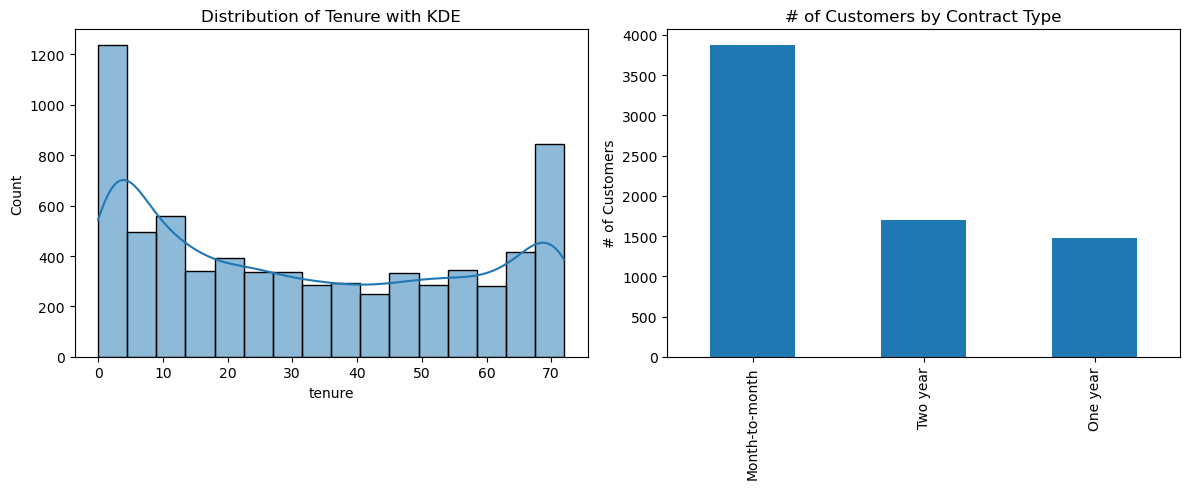

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the distribution plot for 'tenure' with KDE
sns.histplot(df['tenure'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Tenure with KDE')

# Plotting the bar plot for '# of Customers by Contract Type'
ax = df['Contract'].value_counts().plot(kind='bar',ax=axes[1])
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

plt.tight_layout()
plt.show()

**`Observations`**

**Distribution of Tenure with KDE:**

- The left graph displays the distribution of customer tenure.
- It exhibits a bimodal distribution, meaning there are two significant peaks.
- The first peak occurs around 0-10 tenure, indicating a large number of new customers.
- The second peak is near 70 tenure, suggesting a substantial group of long-term customers.
- The Kernel Density Estimation (KDE) line overlays the bars, showing the probability density function.

 **Number of Customers by Contract Type:**
- The right graph represents the number of customers based on contract type.
- The majority of customers are on month-to-month contracts (indicated by the blue bar).
- Two-year contracts come next (also in blue), followed by one-year contracts (grey bar).

### Analysis on Tenure by Contract Type

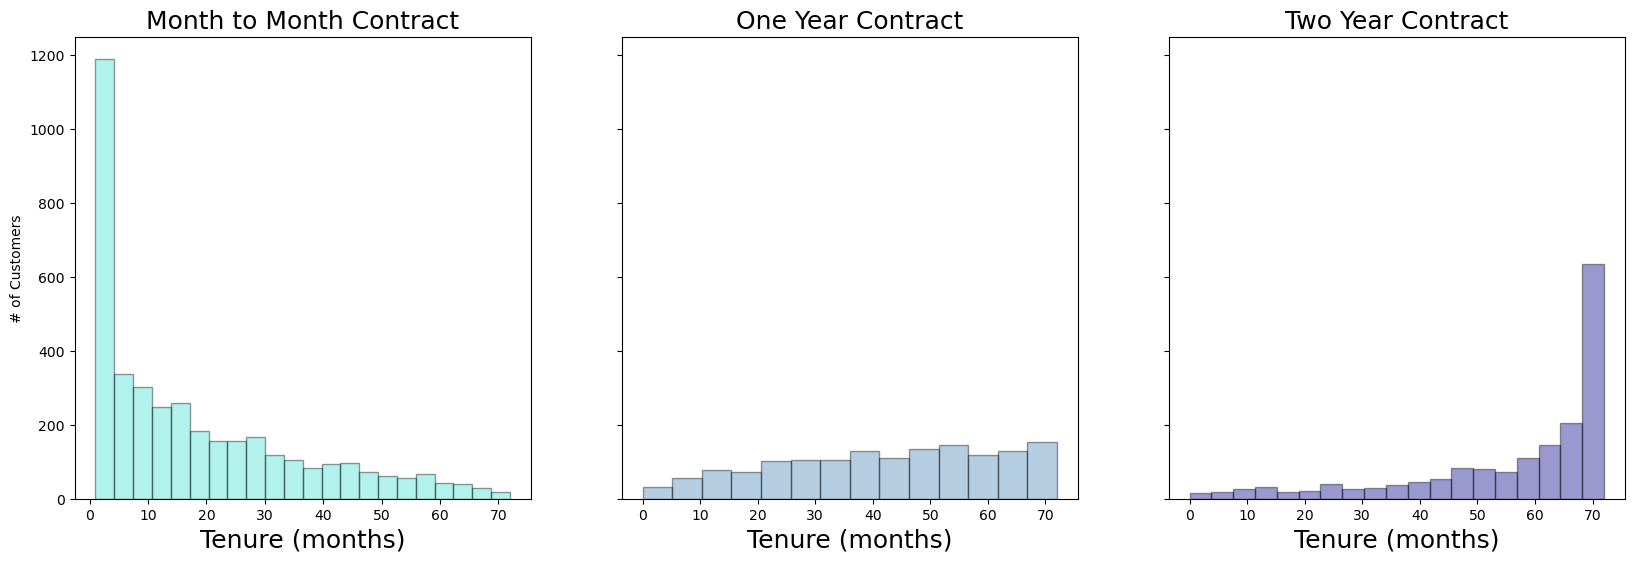

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

ax = sns.distplot(df[df['Contract'] == 'Month-to-month']['tenure'],
                  hist=True, kde=False,
                  color='turquoise',
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)', size=18)
ax.set_title('Month to Month Contract', size=18)

ax = sns.distplot(df[df['Contract'] == 'One year']['tenure'],
                  hist=True, kde=False,
                  color='steelblue',
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax2)
ax.set_xlabel('Tenure (months)', size=18)
ax.set_title('One Year Contract', size=18)

ax = sns.distplot(df[df['Contract'] == 'Two year']['tenure'],
                  hist=True, kde=False,
                  color='darkblue',
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax3)

ax.set_xlabel('Tenure (months)', size=18)
ax.set_title('Two Year Contract', size=18)

plt.show()

### Analysis by Services

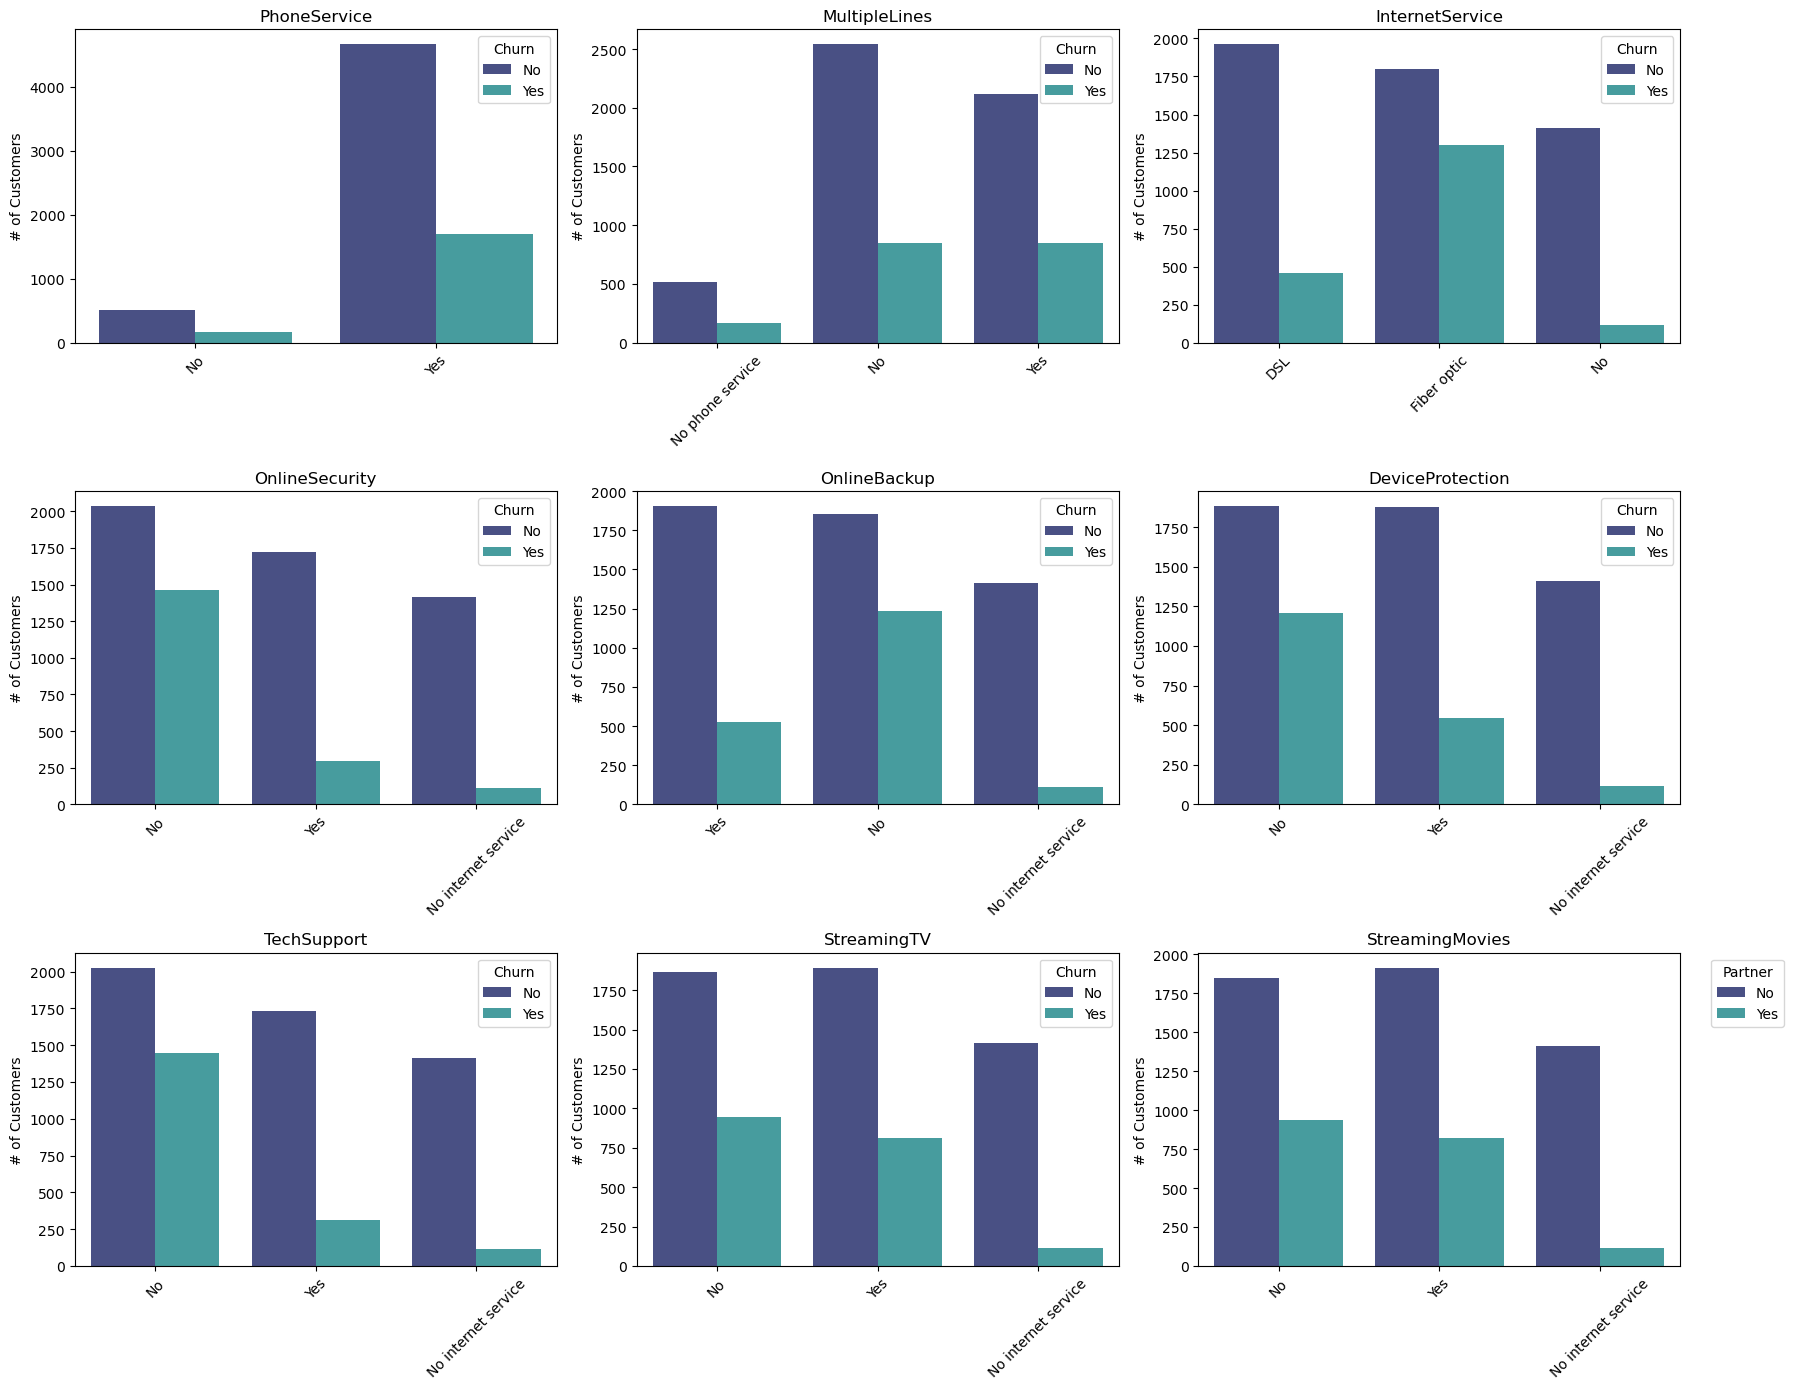

In [22]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 14))

axes = axes.flatten()

for i, item in enumerate(services):
    ax = sns.countplot(x=item, data=df, hue='Churn', ax=axes[i], palette='mako')
    ax.set_title(item)
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('# of Customers')
    ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels

plt.legend(title='Partner', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

`OBSERVATIONS`:
- Tech Support has high churn distribution
- Lack of tech support gives a bad service experience to the customers
- Customers who are not streaming TV are more likely to churn
- Customers who deos'nt have Online Security are might feeling lack of security. There is high churning rate
- Customers who doesn't have a device protection are also likely to churn

### 3. Customers with partners and their services

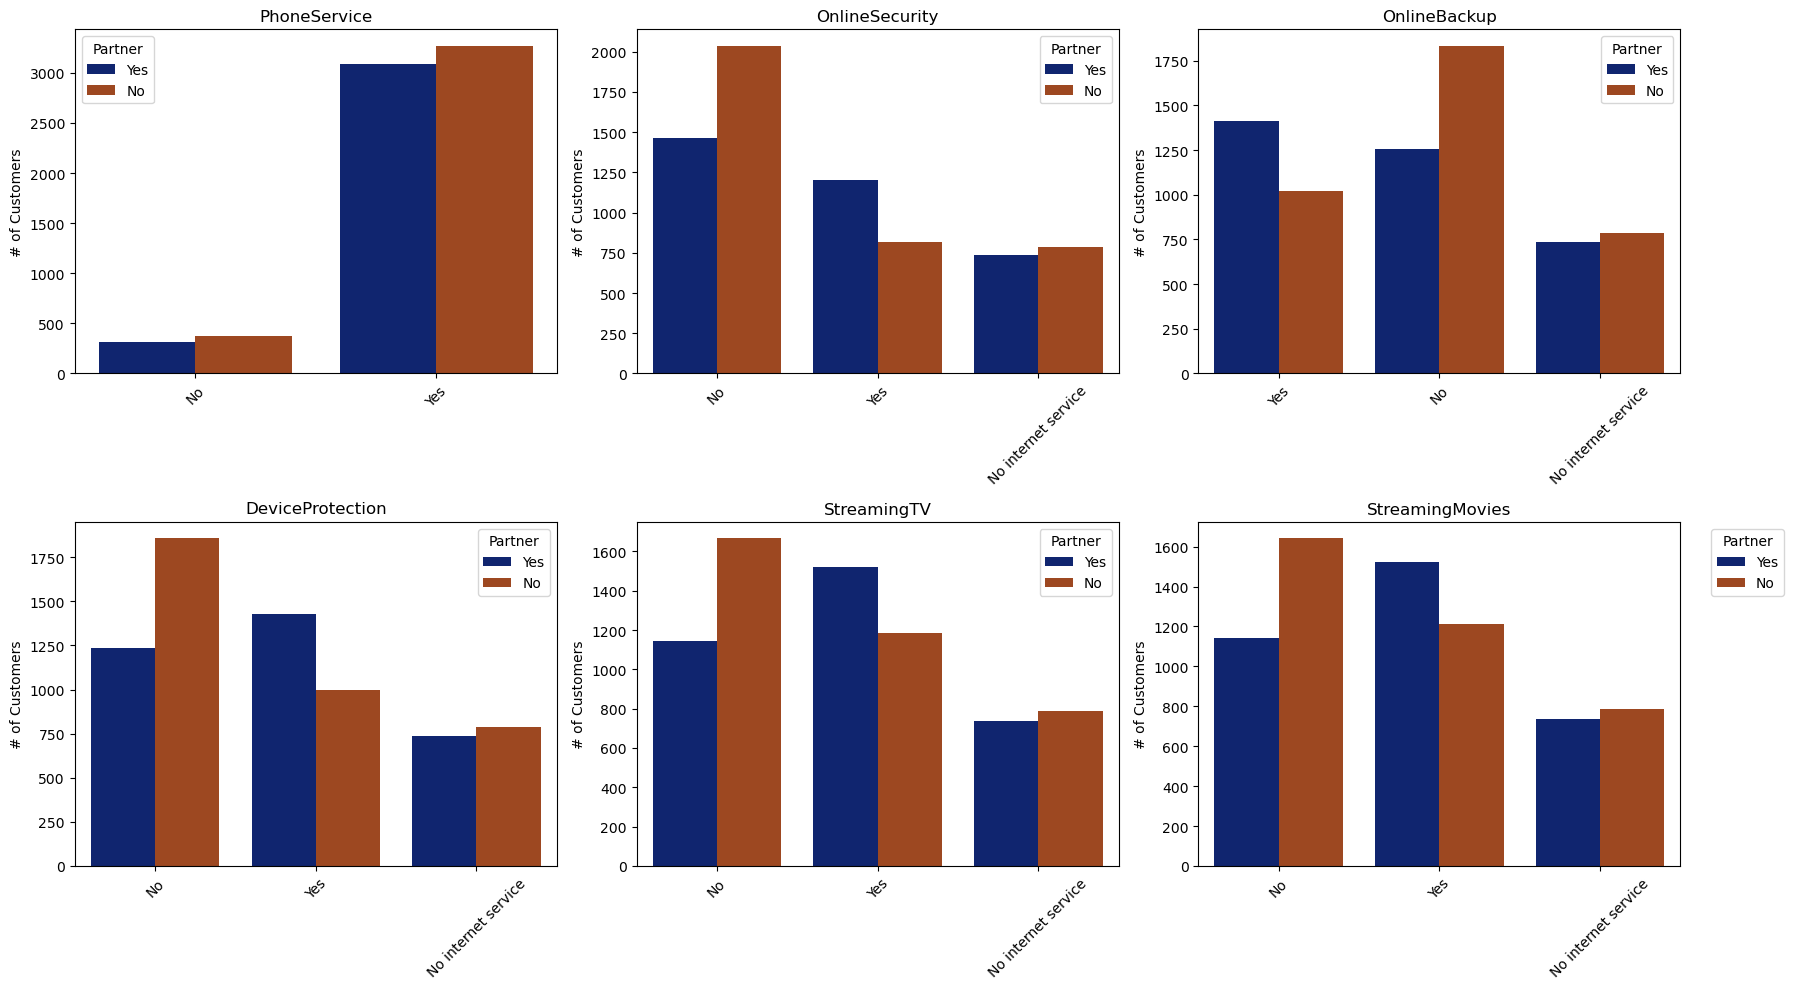

In [23]:
services = ['PhoneService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'StreamingTV', 'StreamingMovies']

# Creating subplots with appropriate layout and figure size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Iterating through the services and plot on respective subplots with 'hue' as 'Partner'
for i, item in enumerate(services):
    ax = sns.countplot(x=item, data=df, hue='Partner', ax=axes[i], palette='dark')
    ax.set_title(item)
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('# of Customers')
    ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels

# Adding legend outside the subplots
plt.legend(title='Partner', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjusting layout and show plot
plt.tight_layout()
plt.show()

`Observtions`:
- customers with parners are utlizing the phone service and less likely to churn
- Customers with partners with streamTv and StreamMovies are more likely to churn
- Maybe cutomers feeling recommendations or the partnering channels are not good

### Customer with Dependents and the services they are using

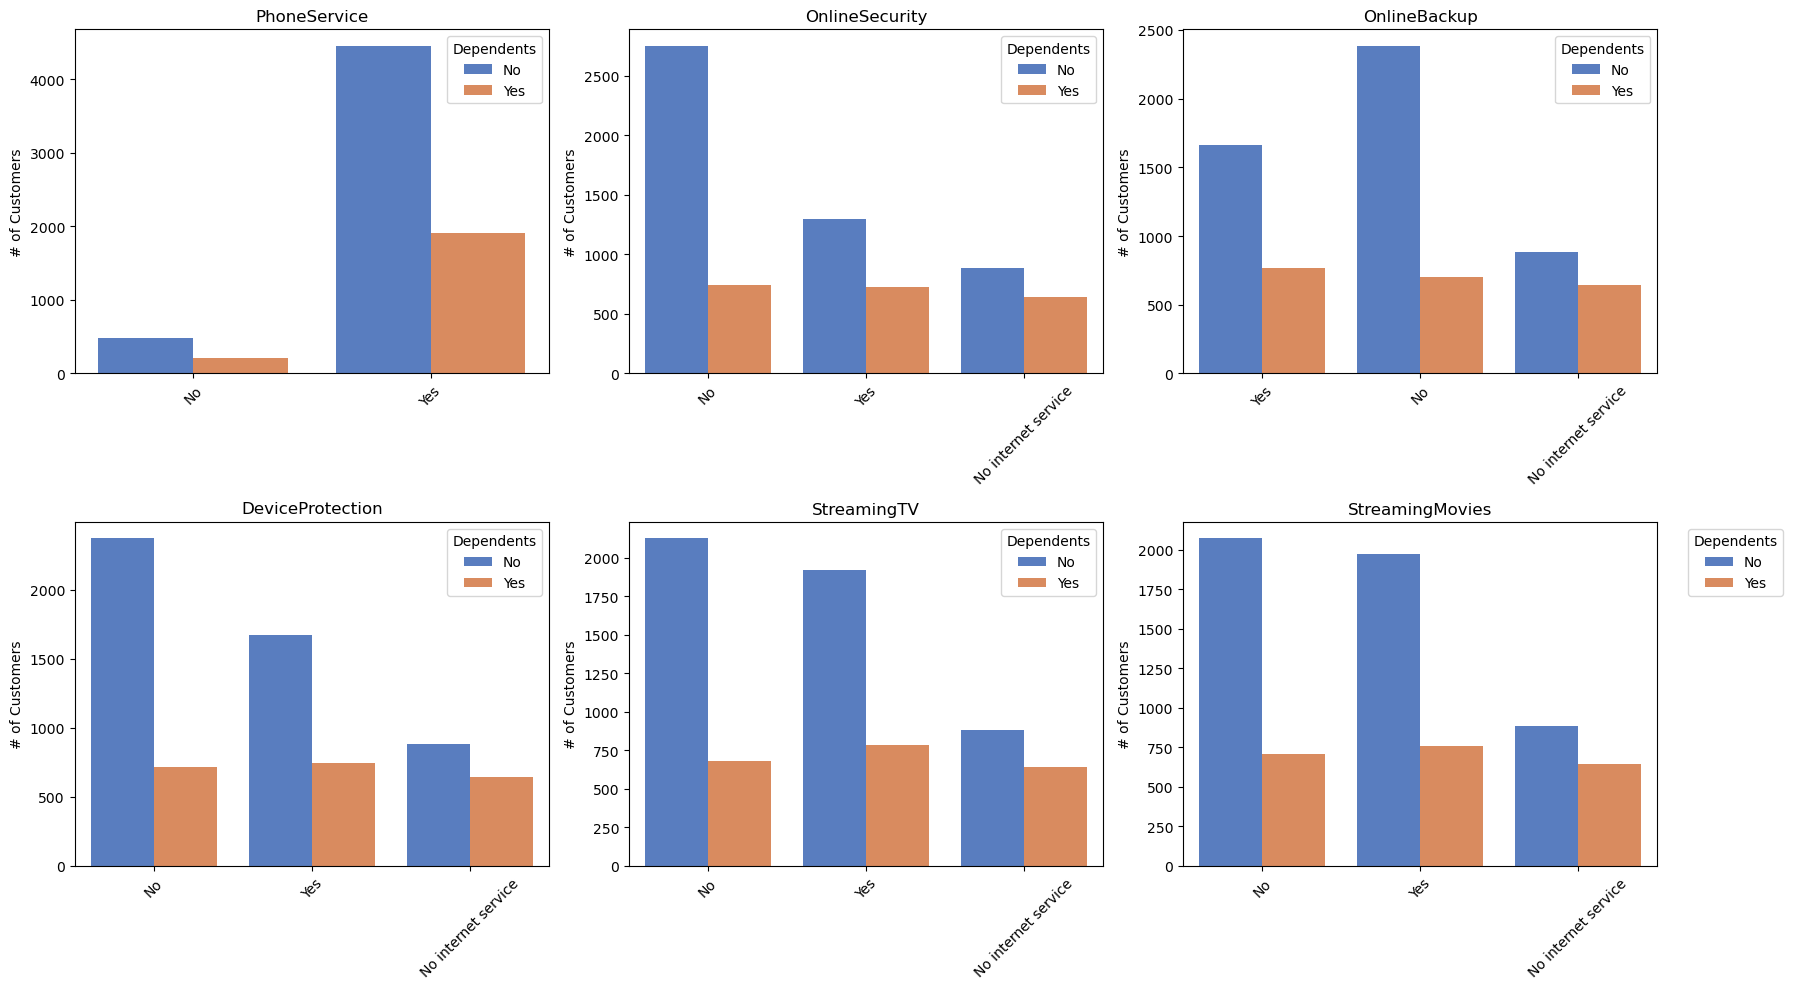

In [24]:
services = ['PhoneService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'StreamingTV', 'StreamingMovies']

# Creating subplots with appropriate layout and figure size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Iterating through the services and plot on respective subplots with 'hue' as 'Partner'
for i, item in enumerate(services):
    ax = sns.countplot(x=item, data=df, hue='Dependents', ax=axes[i], palette='muted')
    ax.set_title(item)
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('# of Customers')
    ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels

# Adding legend outside the subplots
plt.legend(title='Dependents', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjusting layout and show plot
plt.tight_layout()
plt.show()

`Observations`:
- Customers with children form a moderate churn ratio
- Mostly they are churning with the phone service

### Senior Citizens

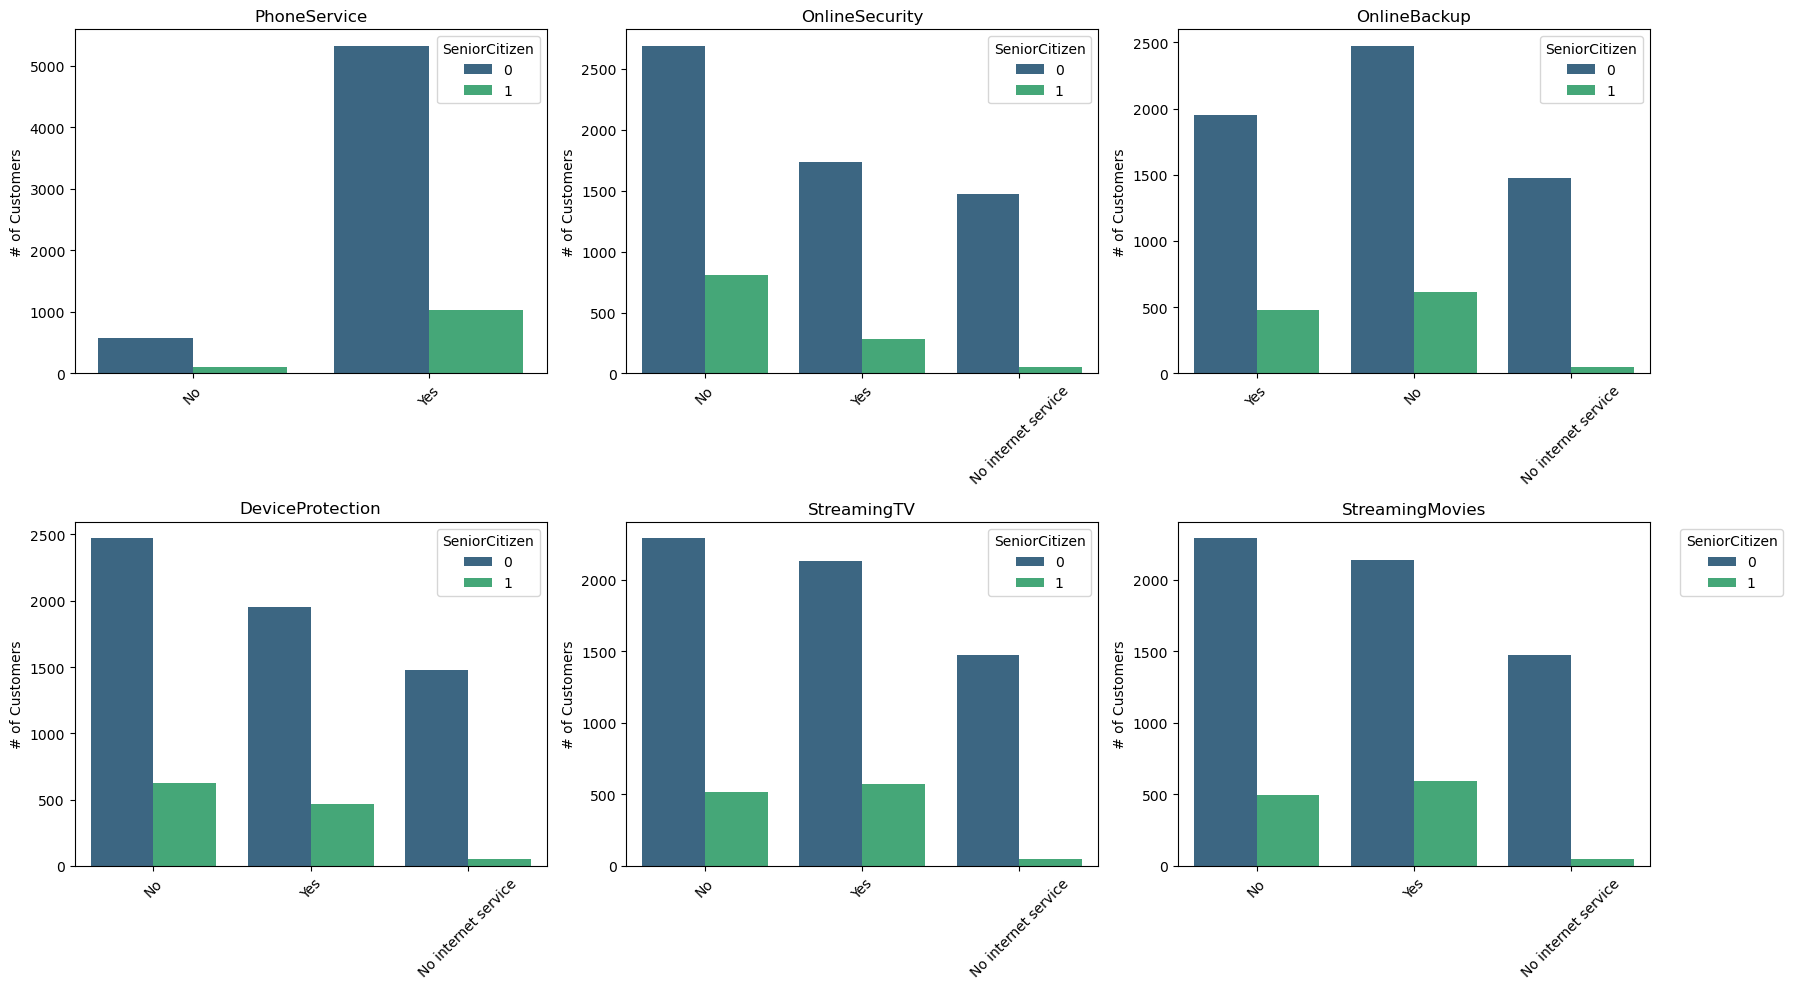

In [25]:
services = ['PhoneService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

axes = axes.flatten()

for i, item in enumerate(services):
    ax = sns.countplot(x=item, data=df, hue='SeniorCitizen', ax=axes[i], palette='viridis')
    ax.set_title(item)
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('# of Customers')
    ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels

plt.legend(title='SeniorCitizen', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Let's see the relation between Montly charges and Total Charges

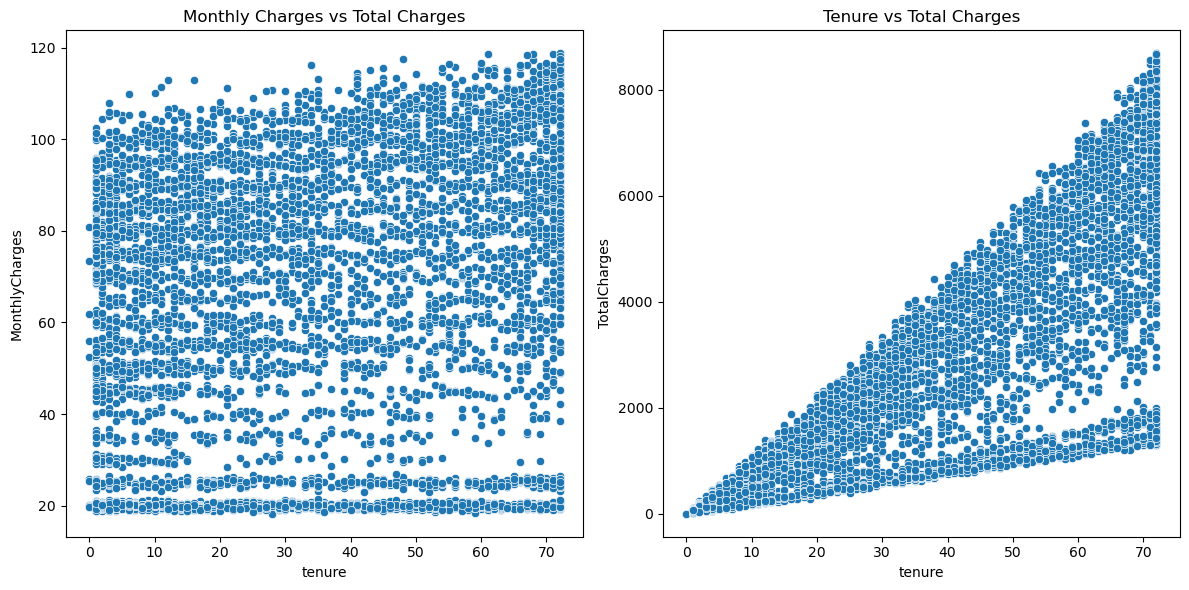

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#  'MonthlyCharges' vs 'TotalCharges'
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df, ax=axes[0], palette='viridis', markers=True)
axes[0].set_title('Monthly Charges vs Total Charges')

# 'tenure' vs 'TotalCharges'
sns.scatterplot(x='tenure', y='TotalCharges', data=df2, ax=axes[1])
axes[1].set_title('Tenure vs Total Charges')

# Show the plot
plt.tight_layout()
plt.show()

`Observations`

**Monthly Charges vs Total Charges:**

- The left scatter plot shows the relationship between monthly charges and total charges.
- There is a wide distribution of data points, indicating variability.
- No clear pattern or trend is visible; the points are scattered randomly.

**Tenure vs Total Charges:**

-The right scatter plot illustrates the relationship between tenure (duration of customer relationship) and total charges.
- There is a clear positive correlation:
- As tenure increases, total charges also increase.
- The data points form a triangular shape, suggesting that long-term customers tend to have higher total charges.

#### Lets now explore the churn rate by Partner and Dependent Status, Senior Citizen,  tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.
### 1. Partner and dependent

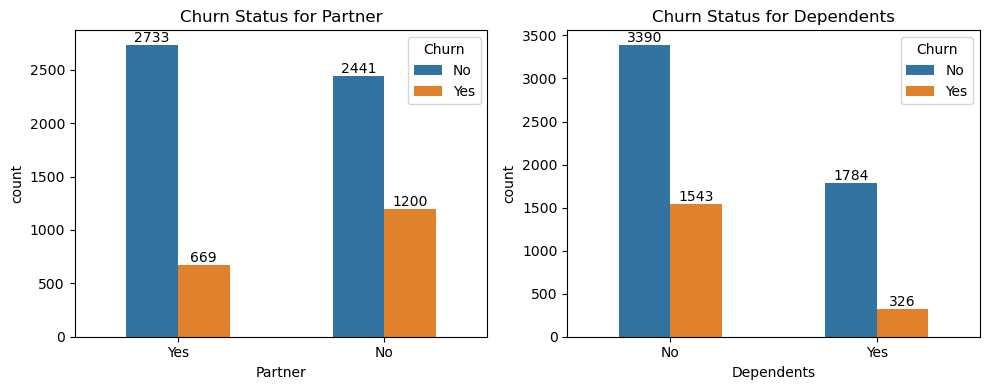

In [27]:
# Create subplots with appropriate layout and figure size
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plotting the first count plot in the first subplot
sns.countplot(x='Partner', data=df, hue='Churn', width=0.5, ax=axes[0])
axes[0].set_title('Churn Status for Partner')

# Plotting the second count plot in the second subplot
sns.countplot(x='Dependents', data=df, hue='Churn', width=0.5, ax=axes[1])
axes[1].set_title('Churn Status for Dependents')

# Adding data labels to both subplots
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

`Observation`:
- From the above grapgh we can say that cutomers who are single are more likely to churn
- Maybe the lack of services and content shown are not attracting the single customers

### 2. Churn vs Tenure

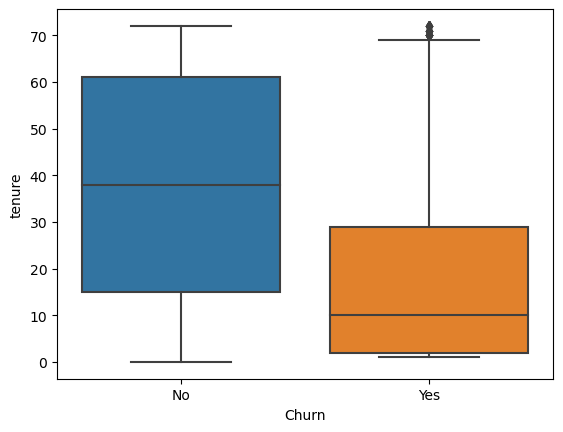

In [28]:
# plotting the boxplot
sns.boxplot(x = df['Churn'], y = df['tenure'])
plt.show()

`Observations`: As we observed above the longer the tenure and contract the lesser the churning chances of the customers

### 3. Contract vs Churn

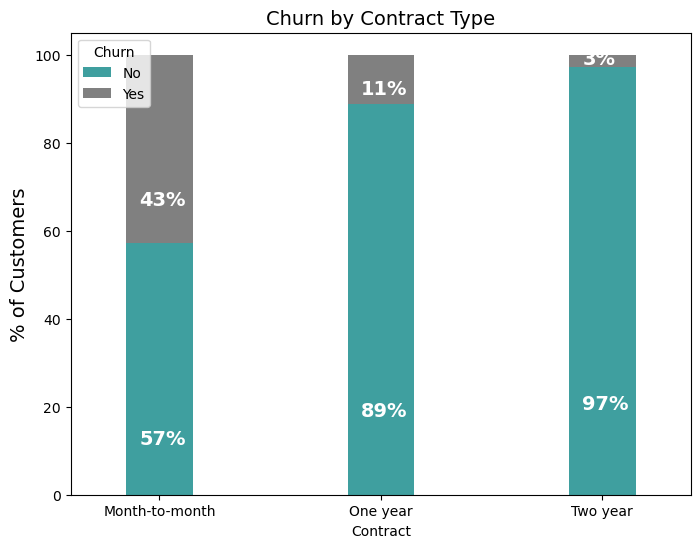

In [29]:
# grouping the contract and churn
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

#plotting the graph
ax = (contract_churn.T*100.0 / contract_churn.T.sum()
     ).T.plot(kind='bar', width = 0.3, stacked = True,
              rot = 0, figsize = (8,6), color = colors)

ax.legend(loc='best',prop={'size':10},title = 'Churn')
ax.set_ylabel('% of Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height),
                (p.get_x()+.20*width, p.get_y()+.2*height),
                color = 'white', weight = 'bold', size = 14)

`Observations`: People who opt for longer contract stay loyal to the company. people with month to month contract are more churning

### 4. Internet Sevice vs Churn

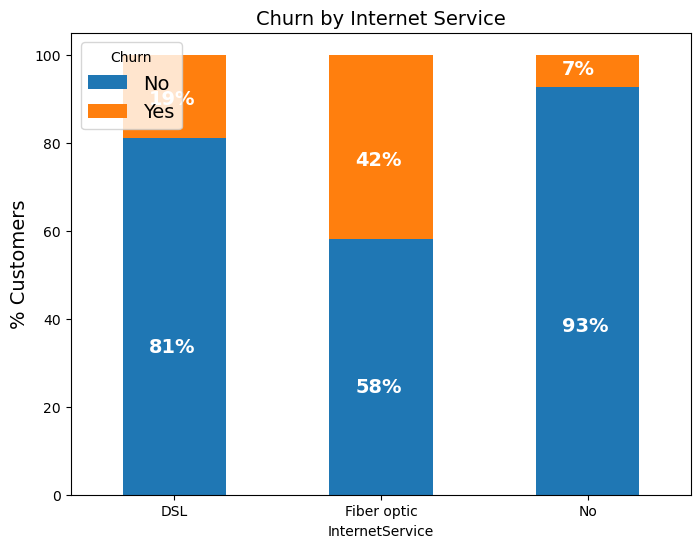

In [30]:
churn = df.groupby(['InternetService','Churn']).size().unstack()

ax = (churn.T*100.0 / churn.T.sum()).T.plot(kind='bar', stacked = True,
                                            rot = 0, figsize = (8,6))

ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Internet Service',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

`Observation`
-  Strangely customers with no internet services have only 7% churn rate, and customers with DSL's churn percentae is 19% and Fiber Optic is 58%. Fiber optic is new technology which has a drawback of wire damage issues so it might be the one of the reasons for about 60% churn

### 5. Payment Method vs Churn

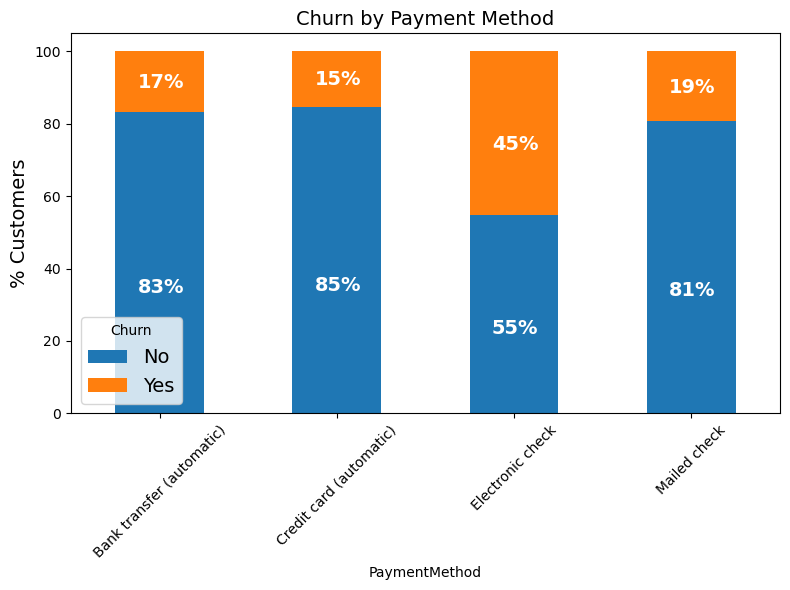

In [31]:
churn = df.groupby(['PaymentMethod', 'Churn']).size().unstack()
churn_percentage = (churn.T * 100.0 / churn.T.sum()).T

# Plotting the stacked bar chart
ax = churn_percentage.plot(kind='bar', stacked=True, rot=0, figsize=(8, 6))

ax.legend(loc='best', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Payment Method', size=14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height),
                (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color='white', weight='bold', size=14)

# Rotate x-axis ticks to 45 or 60 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Adjust the rotation angle as needed

plt.tight_layout()
plt.show()

`Observations`:
- The automatic payment customers have less churning rate.
- people who have manual payment method are highly churning
- Company can give offers on automatic payments to avoid the churning customers

### 6. Churn by TechSupport

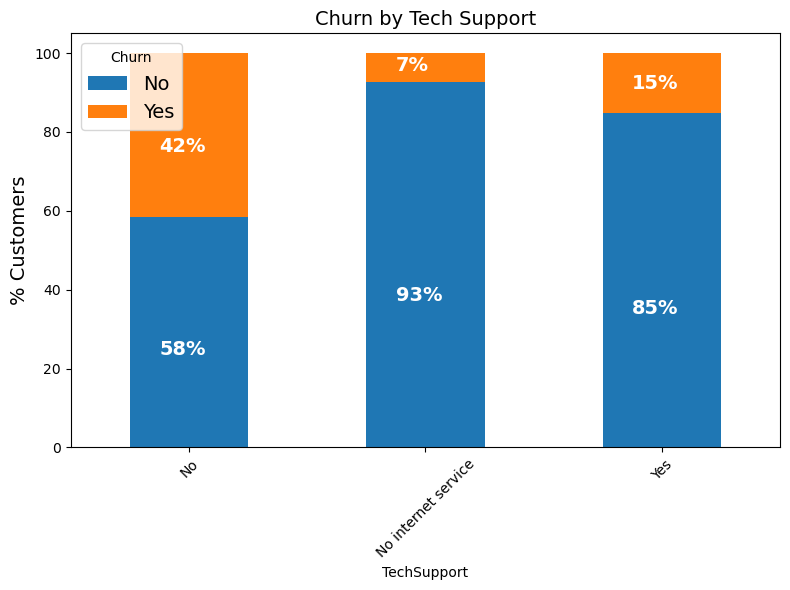

In [32]:
churn = df.groupby(['TechSupport', 'Churn']).size().unstack()
churn_percentage = (churn.T * 100.0 / churn.T.sum()).T

ax = churn_percentage.plot(kind='bar', stacked=True, rot=0, figsize=(8, 6))

ax.legend(loc='best', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Tech Support', size=14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height),
                (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color='white', weight='bold', size=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Adjust the rotation angle as needed

plt.tight_layout()
plt.show()

As we explored before people who does'nt have tech support are churn rate of 42%.

### Churn by Different Categorical Columns

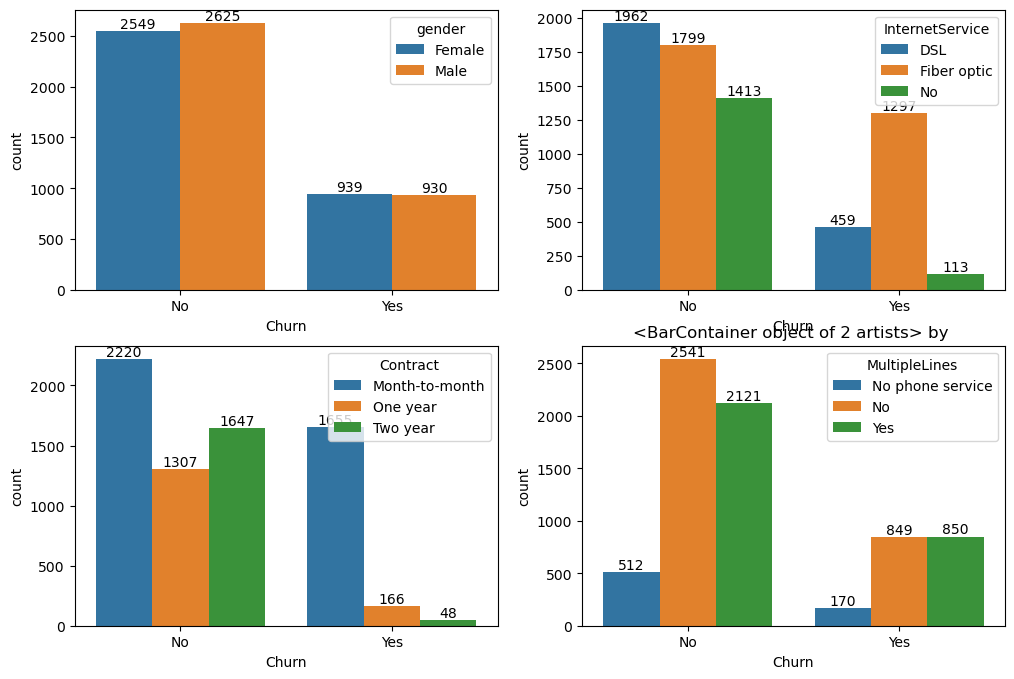

In [33]:
cols = ['gender','InternetService','Contract','MultipleLines']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for i,col in enumerate(cols):
    ax= sns.countplot(data=df,x='Churn',hue=col,ax=axes[i])
    for i in ax.containers:
        ax.bar_label(i)
    plt.title(f'{i} by ')

### 7. Monthly charges vs Churn

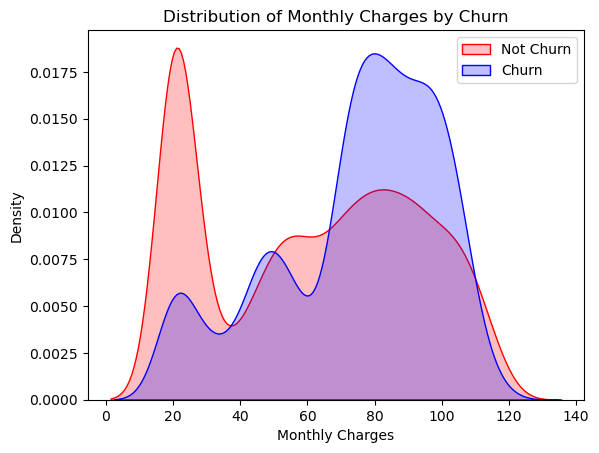

In [34]:
not_churn = df.MonthlyCharges[df["Churn"] == 'No']
churn = df.MonthlyCharges[df["Churn"] == 'Yes']

# Creating a KDE plot for not churned customers
ax = sns.kdeplot(not_churn, color="Red", shade=True)

# Overlay a KDE plot for churned customers on the same axes
ax = sns.kdeplot(churn, ax=ax, color="Blue", shade=True)

ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

# Show the plot
plt.show()


`Observation`:
- The more the charges the more cutomers are likely to churn
- After some point customer might feel burden to stay with high charges.
- Instead of coping up with the charges, they are churning towards other companies

### HeatMap for checking relation between each numerical column

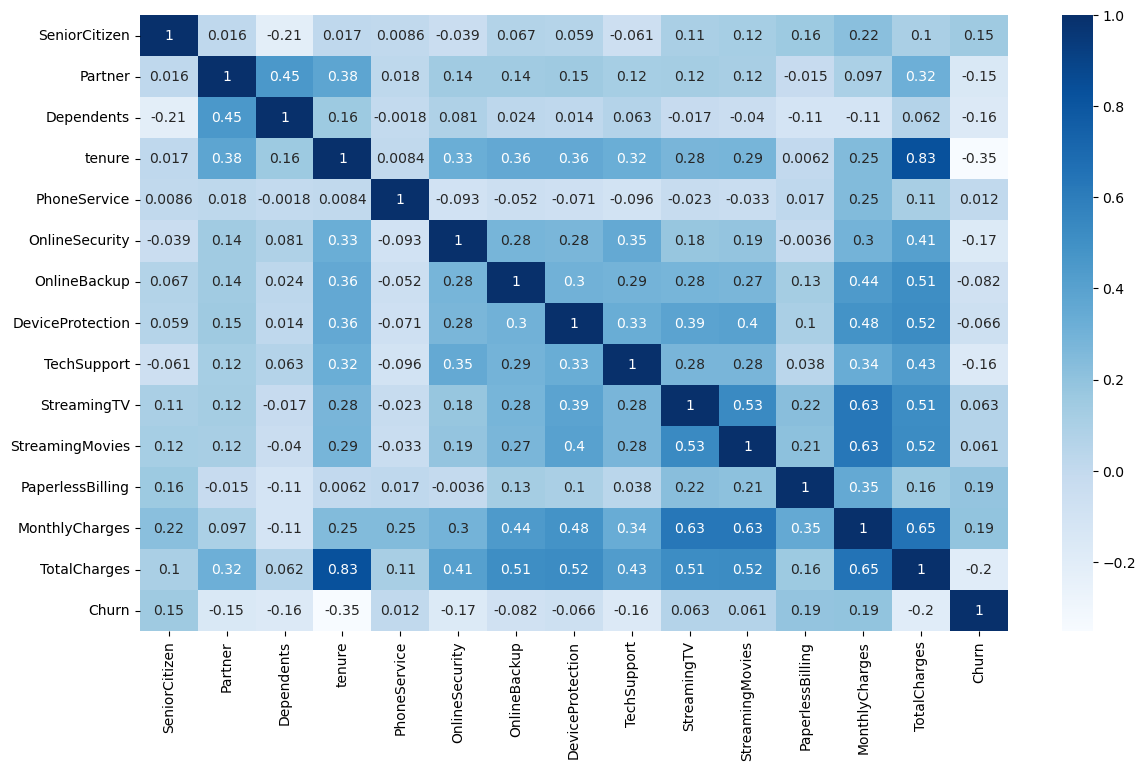

In [35]:
plt.figure(figsize=(14,8))

sns.heatmap(df2.corr(numeric_only=True),annot=True, cmap='Blues')
plt.show()

### Feature Selection

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder

sc = StandardScaler()
ohe = OneHotEncoder()

data = df2.copy()
# dropping weak associated columnn as per ChiSquare and Cramers V
data.drop(columns=['MultipleLines','StreamingMovies','gender',
                  'SeniorCitizen','Partner','Dependents','customerID'],inplace=True)

dummy = pd.get_dummies(data, columns=['InternetService','Contract','PaymentMethod'],
                       drop_first=True, dtype='int')

In [37]:
dummy

tenure  PhoneService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0          1             0               0             1                 0   
1         34             1               1             0                 1   
2          2             1               1             1                 0   
3         45             0               1             0                 1   
4          2             1               0             0                 0   
...      ...           ...             ...           ...               ...   
7038      24             1               1             0                 1   
7039      72             1               0             1                 1   
7040      11             0               1             0                 0   
7041       4             1               0             0                 0   
7042      66             1               1             0                 1   

      TechSupport  StreamingTV  PaperlessBilling  MonthlyCharges  \
0               0            0                 1           29.85   
1               0            0                 0           56.95   
2               0            0                 1           53.85   
3               1            0                 0           42.30   
4               0            0                 1           70.70   
...           ...          ...               ...             ...   
7038            1            1                 1           84.80   
7039            0            1                 1          103.20   
7040            0            0                 1           29.60   
7041            0            0                 1           74.40   
7042            1            1                 1          105.65   

      TotalCharges  Churn  InternetService_Fiber optic  InternetService_No  \
0            29.85      0                            0                   0   
1          1889.50      0                            0                   0   
2           108.15      1                            0                   0   
3          1840.75      0                            0                   0   
4           151.65      1                            1                   0   
...            ...    ...                          ...                 ...   
7038       1990.50      0                            0                   0   
7039       7362.90      0                            1                   0   
7040        346.45      0                            0                   0   
7041        306.60      1                            1                   0   
7042       6844.50      0                            1                   0   

      Contract_One year  Contract_Two year  \
0                     0                  0   
1                     1                  0   
2                     0                  0   
3                     1                  0   
4                     0                  0   
...                 ...                ...   
7038                  1                  0   
7039                  1                  0   
7040                  0                  0   
7041                  0                  0   
7042                  0                  1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               1   
...                                     ...                             ...   
7038                                      0                               0   
7039                                      1                               0   
7040                                      0        

In [38]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   PhoneService                           7043 non-null   int64  
 2   OnlineSecurity                         7043 non-null   int64  
 3   OnlineBackup                           7043 non-null   int64  
 4   DeviceProtection                       7043 non-null   int64  
 5   TechSupport                            7043 non-null   int64  
 6   StreamingTV                            7043 non-null   int64  
 7   PaperlessBilling                       7043 non-null   int64  
 8   MonthlyCharges                         7043 non-null   float64
 9   TotalCharges                           7043 non-null   float64
 10  Churn                                  7043 non-null   int64  
 11  Inte

In [39]:
dummy['TotalCharges'] = dummy['TotalCharges'].replace(' ', '0')

In [40]:
dummy['TotalCharges'] = dummy['TotalCharges'].astype('float64')

In [41]:
dummy['TotalCharges'].value_counts()

0.00       11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6531, dtype: int64

### Recursive Feature Elimination

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = dummy.drop(columns=['Churn'],axis=1)
y = dummy['Churn']

model = LogisticRegression(solver='liblinear')

rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Print the selected features
selected_features = X.columns[fit.support_]
print("Selected Features:", selected_features)


Num Features: 10
Selected Features: [False  True  True  True False  True False  True False False  True  True
  True  True False  True False]
Feature Ranking: [5 1 1 1 4 1 3 1 6 8 1 1 1 1 2 1 7]
Selected Features: Index(['PhoneService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'PaperlessBilling', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')


### Tree Based Feature Importance

In [43]:
y = dummy['Churn']
X = dummy.drop(columns=['Churn'],axis=1)

from sklearn.ensemble import RandomForestClassifier

# Model to use for feature selection
model = RandomForestClassifier()

model.fit(X, y)

importances = model.feature_importances_

# Convert to a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                                  Feature  Importance
9                            TotalCharges    0.243176
8                          MonthlyCharges    0.226838
0                                  tenure    0.193921
10            InternetService_Fiber optic    0.048359
15         PaymentMethod_Electronic check    0.041237
13                      Contract_Two year    0.034582
7                        PaperlessBilling    0.026191
12                      Contract_One year    0.025396
2                          OnlineSecurity    0.024138
5                             TechSupport    0.024019
3                            OnlineBackup    0.021722
4                        DeviceProtection    0.020415
11                     InternetService_No    0.019768
6                             StreamingTV    0.016893
14  PaymentMethod_Credit card (automatic)    0.013541
16             PaymentMethod_Mailed check    0.012573
1                            PhoneService    0.007229


After applying all the techniques i have decided to drop phone service column. Although it showed importance in RFE, in the EDA there is less importance of that column

In [44]:
# dropping the PhoneService column
dummy.drop(columns=['PhoneService'],inplace=True)

In [45]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Assuming df_outliers is your DataFrame containing the data
# Let's say X contains the feature columns and y contains the target variable
x = dummy.drop(columns=['Churn'],axis=1)
y = dummy['Churn']

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Generate synthetic data
X_resampled, y_resampled = smote.fit_resample(x, y)

# Check the class distribution after SMOTE
print("Original class distribution:", Counter(y))
print("Resampled class distribution:", Counter(y_resampled))

# Create a DataFrame from the resampled data
columns = x.columns
resampled_df = pd.DataFrame(X_resampled, columns=columns)
resampled_df['Churn'] = y_resampled


Original class distribution: Counter({0: 5174, 1: 1869})
Resampled class distribution: Counter({0: 5174, 1: 5174})


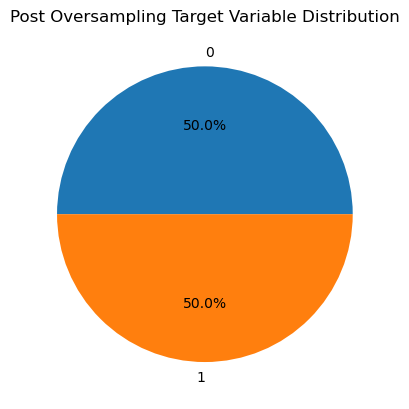

In [46]:
resampled = resampled_df['Churn'].value_counts()

plt.pie(resampled, labels=resampled.index, autopct='%1.1f%%')
plt.title('Post Oversampling Target Variable Distribution')
plt.show()

In [47]:
from sklearn.model_selection import train_test_split

X = resampled_df.drop(columns=['Churn'],axis=1)
y = resampled_df['Churn']

print(X.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10348, 16)
(10348,)
(8278, 16)
(2070, 16)
(8278,)
(2070,)


In [48]:
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.transform(x_test))

## Model Building

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
from time import time

pipelines = {
  'Logistic Regression': Pipeline([('Classifier', LogisticRegression(class_weight ='balanced'))]),
    #'SVC': Pipeline([('Classifier', SVC(kernel='linear'))]),
    'Decision Tree': Pipeline([('Classifier', DecisionTreeClassifier(criterion='entropy', max_depth=8))]),
    'KNN': Pipeline([('Classifier', KNeighborsClassifier(n_neighbors=4))]),
  'Random Forest':Pipeline([('Classifier', RandomForestClassifier(max_depth=8, n_estimators=100))])}

for name, pipeline in pipelines.items():
    start_time = time()  # Record start time
    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict(x_test)
    end_time = time()  # Record end time

    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
    print(f"Time taken to predict: {end_time - start_time} seconds")
    print()

Model: Logistic Regression
Accuracy: 0.8285024154589372
Confusion Matrix:
[[798 223]
 [132 917]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1021
           1       0.80      0.87      0.84      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

Time taken to predict: 0.026953935623168945 seconds

Model: Decision Tree
Accuracy: 0.8009661835748793
Confusion Matrix:
[[790 231]
 [181 868]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1021
           1       0.79      0.83      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070

Time taken to predict: 0.027191162109375 seconds

Model: KN

## Let's Undersample the data and build a model and check how model performs

In [51]:
# lets use under sampling and try to build a model on that

class_0 = dummy[dummy['Churn'] == 0]
class_1 = dummy[dummy['Churn'] == 1]

# Randomly sample 5953 instances from class 0
class_0_balanced = class_0.sample(n=1869, random_state=42)

# Concatenate the balanced class 0 with class 1
balanced_df = pd.concat([class_0_balanced, class_1])

# Shuffle the rows to mix the classes
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the balanced class distribution
print(balanced_df['Churn'].value_counts())

0    1869
1    1869
Name: Churn, dtype: int64


In [52]:
y = balanced_df['Churn']
X = balanced_df.drop(columns=['Churn'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=42)

print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)


sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.transform(x_test))

(2803, 16)
(2803,)

(935, 16)
(935,)


In [53]:
from time import time

pipelines = {
  'Logistic Regression': Pipeline([('Classifier', LogisticRegression(class_weight ='balanced'))]),
    #'SVC': Pipeline([('Classifier', SVC(kernel='linear'))]),
    'Decision Tree': Pipeline([('Classifier', DecisionTreeClassifier(criterion='entropy', max_depth=8))]),
    'KNN': Pipeline([('Classifier', KNeighborsClassifier(n_neighbors=4))]),
  'Random Forest':Pipeline([('Classifier', RandomForestClassifier(max_depth=8, n_estimators=100))])}

for name, pipeline in pipelines.items():
    start_time = time()  # Record start time
    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict(x_test)
    end_time = time()  # Record end time

    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
    print(f"Time taken to predict: {end_time - start_time} seconds")
    print()

Model: Logistic Regression
Accuracy: 0.7775401069518717
Confusion Matrix:
[[358 127]
 [ 81 369]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.77       485
           1       0.74      0.82      0.78       450

    accuracy                           0.78       935
   macro avg       0.78      0.78      0.78       935
weighted avg       0.78      0.78      0.78       935

Time taken to predict: 0.020773887634277344 seconds

Model: Decision Tree
Accuracy: 0.7422459893048128
Confusion Matrix:
[[332 153]
 [ 88 362]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       485
           1       0.70      0.80      0.75       450

    accuracy                           0.74       935
   macro avg       0.75      0.74      0.74       935
weighted avg       0.75      0.74      0.74       935

Time taken to predict: 0.014221668243408203 seconds

Model:

## Let's build a model on orginal imbalance data and check the results

In [54]:
y = dummy['Churn']
X = dummy.drop(columns=['Churn'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=42)

print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)

sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.transform(x_test))

(5282, 16)
(5282,)

(1761, 16)
(1761,)


In [55]:
from time import time

pipelines = {
  'Logistic Regression': Pipeline([('Classifier', LogisticRegression(class_weight ='balanced'))]),
    #'SVC': Pipeline([('Classifier', SVC(kernel='linear'))]),
    'Decision Tree': Pipeline([('Classifier', DecisionTreeClassifier(criterion='entropy', max_depth=8))]),
    'KNN': Pipeline([('Classifier', KNeighborsClassifier(n_neighbors=4))]),
  'Random Forest':Pipeline([('Classifier', RandomForestClassifier(max_depth=8, n_estimators=100))])}

for name, pipeline in pipelines.items():
    start_time = time()  # Record start time
    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict(x_test)
    end_time = time()  # Record end time

    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
    print(f"Time taken to predict: {end_time - start_time} seconds")
    print()

Model: Logistic Regression
Accuracy: 0.7558205565019875
Confusion Matrix:
[[935 347]
 [ 83 396]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1282
           1       0.53      0.83      0.65       479

    accuracy                           0.76      1761
   macro avg       0.73      0.78      0.73      1761
weighted avg       0.81      0.76      0.77      1761

Time taken to predict: 0.02659893035888672 seconds

Model: Decision Tree
Accuracy: 0.7859170925610448
Confusion Matrix:
[[1126  156]
 [ 221  258]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1282
           1       0.62      0.54      0.58       479

    accuracy                           0.79      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.78      0.79      0.78      1761

Time taken to predict: 0.018846988677978516 seconds

Mod

**`Observation`**
**Case-1**
- In the three cases Logistic Regression performs well than Random Forest
- In th first case Logistic Regression returned an output with an Accuracy of 82% and Precision 85 at identifying Non Churn customers and 81% at identifying Churn customers
- False Positive number is less compared to other models but equal with Random forest
- Hence We can say Logistic Regression performs equal with when it is Balanced Data

**Case-2**
- In the case two when there is very limited amount of data Logistic Regression still managed to deliver equal amount of results to Random Forest
- Notably the time taken was very quick compared to Random Forest.

**Case-3**
- In the case three where there is imbalance data, we can see decrease in precision at identifying Churn customers
- But the False Negative number is very less compared to other algorthms

**Which Algorithmn to choose?**
1. Random Forest is tree based algorithm, when fed with large data it often takes huge number of training time
2. Logistic Regression can be useful in these three scenarios